In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import seaborn as sns
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
print(diabetes_df.head())

df_X = diabetes.data
df_y = diabetes.target
df_X.shape

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


(442, 10)

In [3]:
df_y.shape

(442,)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3,random_state=10)
X_train.shape

(309, 10)

In [5]:
X_train.shape, X_test.shape

((309, 10), (133, 10))

In [6]:
y_train.shape, y_test.shape

((309,), (133,))

In [7]:
W = np.random.rand(10)
b = np.random.rand()

In [8]:
def model(X, W, b):
    predictions = 0
    for i in range(9):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [9]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [10]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [11]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [12]:
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [ -60.64245407  -13.77756008 -189.71985238 -142.69721818  -68.2088867
  -55.93041125  127.78313683 -139.07793048 -182.98755829 -123.64023495]
db: -303.43635251078206


In [13]:
#학습률 설정
LEARNING_RATE = 0.0001

In [14]:
losses = []

for i in range(1, 6001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 28859.1827
Iteration 20 : Loss 28764.1229
Iteration 30 : Loss 28669.4369
Iteration 40 : Loss 28575.1234
Iteration 50 : Loss 28481.1808
Iteration 60 : Loss 28387.6076
Iteration 70 : Loss 28294.4023
Iteration 80 : Loss 28201.5636
Iteration 90 : Loss 28109.0899
Iteration 100 : Loss 28016.9798
Iteration 110 : Loss 27925.2318
Iteration 120 : Loss 27833.8445
Iteration 130 : Loss 27742.8165
Iteration 140 : Loss 27652.1462
Iteration 150 : Loss 27561.8324
Iteration 160 : Loss 27471.8736
Iteration 170 : Loss 27382.2683
Iteration 180 : Loss 27293.0152
Iteration 190 : Loss 27204.1129
Iteration 200 : Loss 27115.5599
Iteration 210 : Loss 27027.3549
Iteration 220 : Loss 26939.4965
Iteration 230 : Loss 26851.9833
Iteration 240 : Loss 26764.8139
Iteration 250 : Loss 26677.9870
Iteration 260 : Loss 26591.5011
Iteration 270 : Loss 26505.3550
Iteration 280 : Loss 26419.5473
Iteration 290 : Loss 26334.0767
Iteration 300 : Loss 26248.9417
Iteration 310 : Loss 26164.1411
Iteration 320 : L

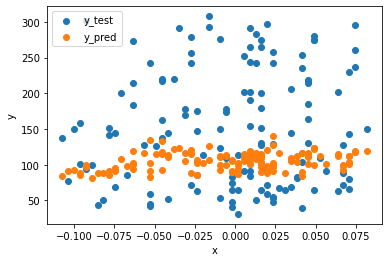

In [15]:
y_pred = model(X_test, W, b)
plt.scatter(X_test[:,0],y_test, label='y_test')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_test[:,0],y_pred, label='y_pred')
plt.legend()
plt.show()

In [41]:
# 자전거 타는 사람은 몇 명?
#데이터 확인하기
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [42]:
train['datetime'] = pd.to_datetime(train['datetime']) #train의 datetime을 판다스의 to_datetime을 이용해주고 ()안에 train[datetime] 을 지정해줘서 문자열 -> datetime으로 변환 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [43]:
import datetime
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [45]:
del train['casual']

In [46]:
del train['registered']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(train,train,test_size=0.2,random_state=10)

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression
lr.fit()
y_pred = lr.predict()

TypeError: fit() missing 3 required positional arguments: 'self', 'X', and 'y'

In [59]:
def model(x,w,b):
    y = x * w + b
    return y

In [60]:
def RMSE(a,b):  
    mse = ((a-b)**2).mean()
    rmse = mse ** 0.5
    return rmse

In [61]:
rmse = RMSE(predictions, y)
rmse

NameError: name 'predictions' is not defined

In [62]:
#손실함수
def loss(x,w,b,y):
    predictions = model(x,w,b)
    L = RMSE(predictions,y)
    return L